In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def strategy_OnlyHeads_static(money_left, bets_left, bet_value=10):
    return 'heads', bet_value

def strategy_OnlyHeads_dynamic(money_left, bets_left, bet_rate=0.1):
    return 'heads', money_left*bet_rate

def strategy_2Heads1Tails_static(money_left, bets_left, bet_value=10):
    return ['heads', 'tails', 'heads'][bets_left % 3], bet_value

def strategy_2Heads1Tails_dynamic(money_left, bets_left, bet_rate=0.1):
    return ['heads', 'tails', 'heads'][bets_left % 3], money_left*bet_rate


def play_game(strategy, rate_or_value="default" ,plot=False):
    money = initial_money
    moneyrecord = [money]

    for bet in range(total_bets):
        # Get results from the strategy
        if rate_or_value is not "default":
            prediction, bet_size = strategy(money, total_bets - bet, rate_or_value)
        else:
            prediction, bet_size = strategy(money, total_bets - bet)

        if bet_size < 1:
            print(f"Round {bet+1}: Bet size smaller than 1. ({bet_size:.1f})")
            moneyrecord.append(money)
            break

        elif bet_size > money:
            print(f'Round {bet+1}: Bet size({bet_size}) too large. (money left: {money})')
            moneyrecord.append(money)
            break

        if np.random.uniform() < heads_prob:
            outcome = 'heads' 
        else:
            outcome = 'tails'

        if prediction == outcome:
            money += bet_size
        else:
            money -= bet_size

        moneyrecord.append(money)

    if plot:
        plt.plot(np.linspace(0,bet+1,bet+2), moneyrecord)
        plt.title(f"Strategy: {strategy.__name__.strip('strategy_')}, bet rate/value: {rate_or_value}")
        plt.annotate('%0.2f' % moneyrecord[-1], xy=(1, moneyrecord[-1]), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
        plt.show()

    return money


Results of betting $10 on heads every time


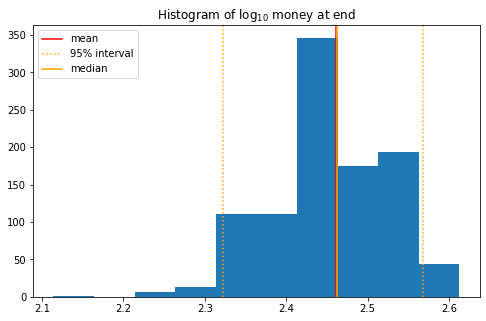

95% interval: [210.0, 290.0]
Expected value: 289.1 

*********************************************************

Results of betting 0.1 of your moneyon heads every time


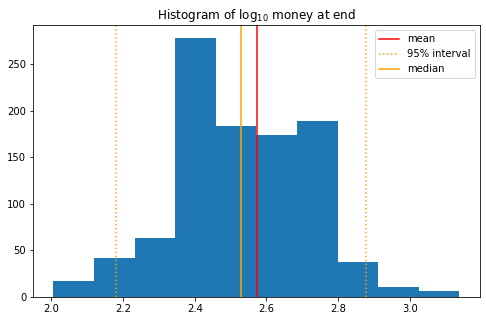

95% interval: [151.4, 337.7]
Expected value: 374.2 

*********************************************************

Results of betting $10 twice on heads, then once on tails


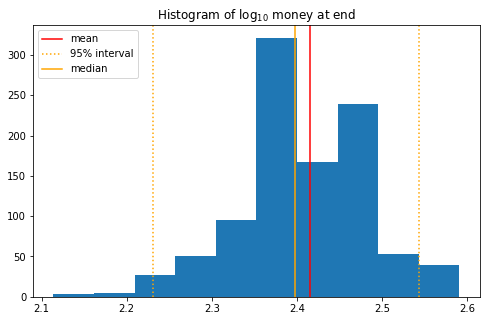

95% interval: [170.0, 250.0]
Expected value: 260.3 

*********************************************************

Results of betting 0.1 of your moneytwice on heads, then once on tails


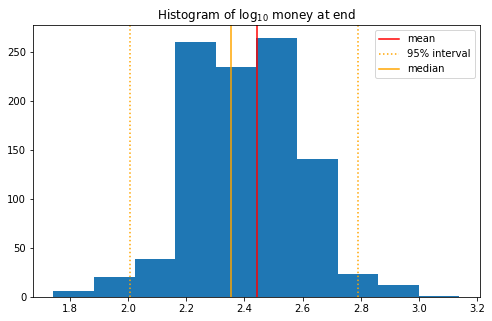

95% interval: [101.3, 226.1]
Expected value: 276.7 

*********************************************************


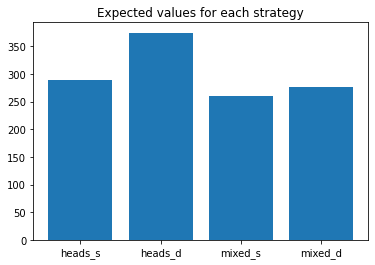

In [ ]:
strategies = {"heads_s":strategy_OnlyHeads_static, "heads_d":strategy_OnlyHeads_dynamic,
              "mixed_s":strategy_2Heads1Tails_static, "mixed_d":strategy_2Heads1Tails_dynamic}


scores = []

initial_money = 250 
total_bets = 20
heads_prob = 0.6
experiment_trials = 1000

for i in strategies:
    if i[-1] == "s":
        print("\n" + "Results of betting $10 " +
              ('twice on heads, then once on tails' if i[:5] =='mixed' 
               else 'on heads every time'))
    elif i[-1] == "d":
        print("\n" + 'Results of betting 0.1 of your money' + 
              ('twice on heads, then once on tails' if i[:5] =='mixed'
               else 'on heads every time'))

    results = []
    for trial in range(experiment_trials):
        results.append(play_game(strategies[i]))
    expected_value = np.mean(results)
    scores.append(expected_value)

    interval_95 = np.percentile(results, (2.5, 50, 97.5))
    results = np.array(results,dtype=float)
    
    plt.figure(figsize=(8, 5))
    plt.hist(np.log10(results, out=np.zeros_like(results), where=(results!=0)))
    plt.axvline(np.log10(expected_value), color='red', linestyle='-', label='mean')
    plt.axvline(np.log10(interval_95[0]), color='orange', linestyle=':', label='95% interval')
    plt.axvline(np.log10(interval_95[2]), color='orange', linestyle=':')
    plt.axvline(np.log10(interval_95[1]), color='orange', linestyle='-', label='median')
    plt.title(r'Histogram of $\log_{10}$ money at end')
    plt.legend()
    plt.show()

    print(f'95% interval: [{interval_95[0]:.1f}, {interval_95[1]:.1f}]')
    print(f'Expected value: {expected_value:.1f} \n')
    print("*********************************************************")

plt.bar([i for i in strategies], scores)
plt.title("Expected values for each strategy")
plt.show()

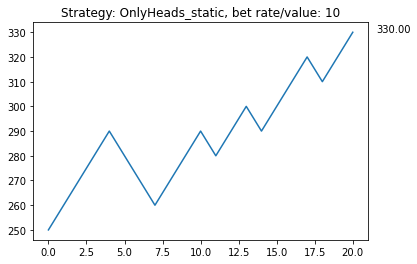

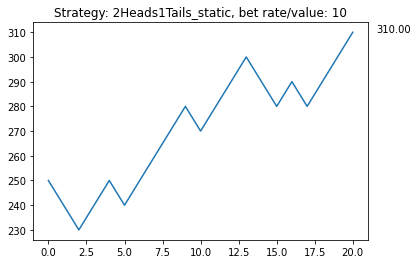

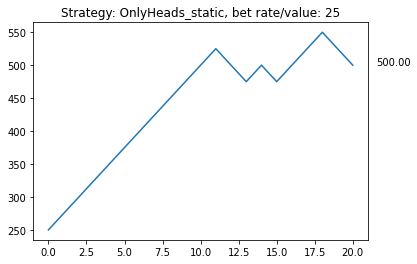

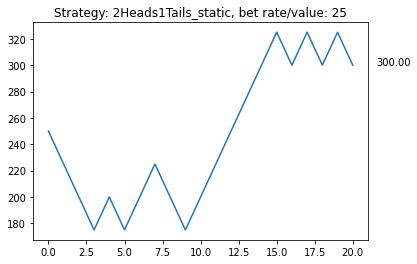

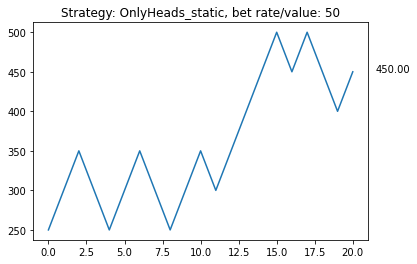

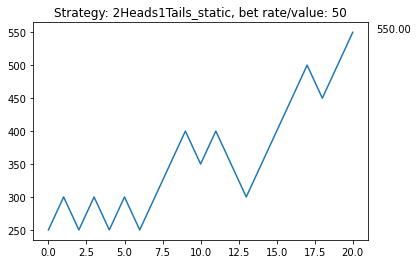

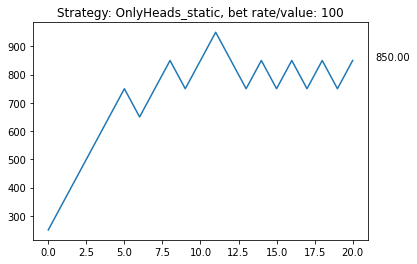

Round 3: Bet size(100) too large. (money left: 50)


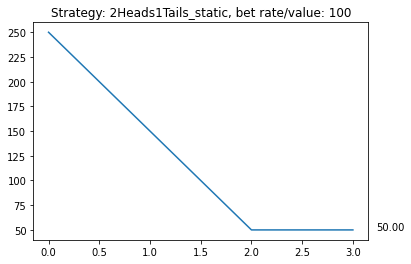

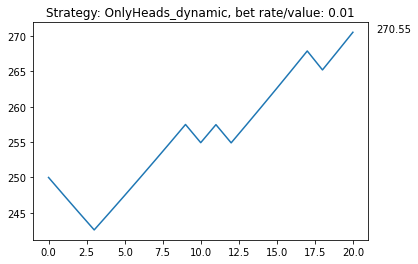

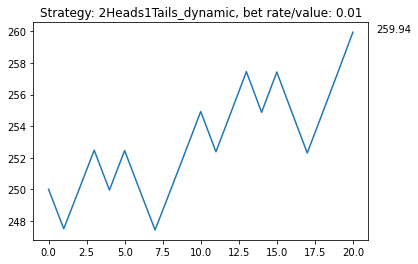

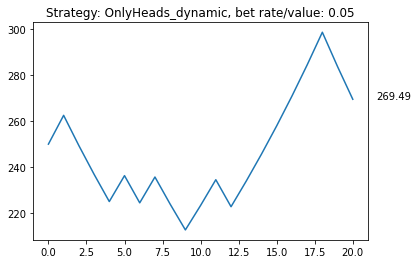

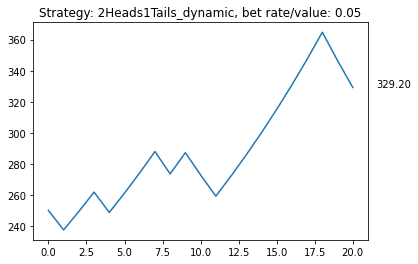

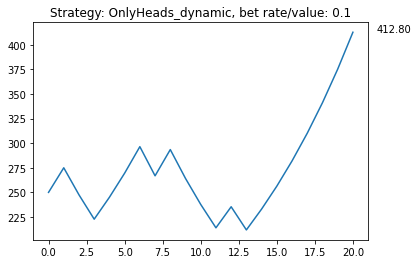

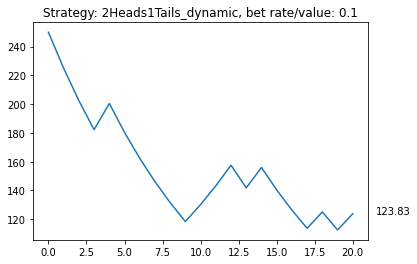

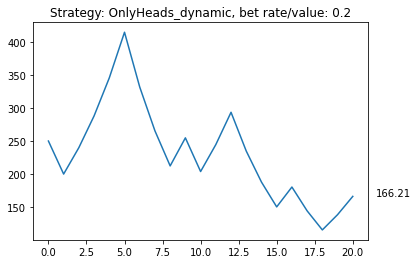

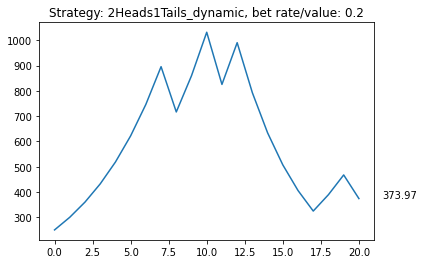

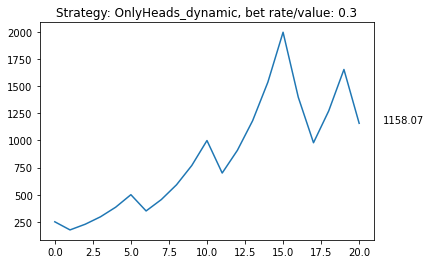

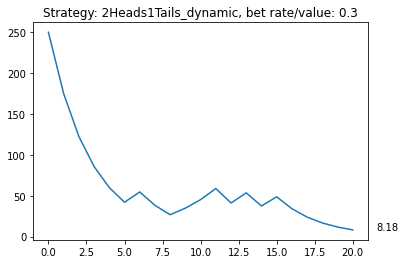

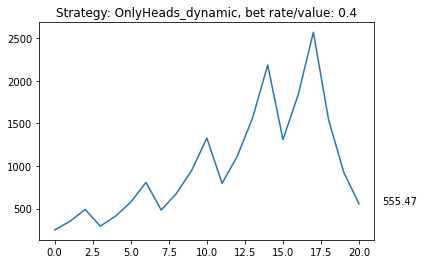

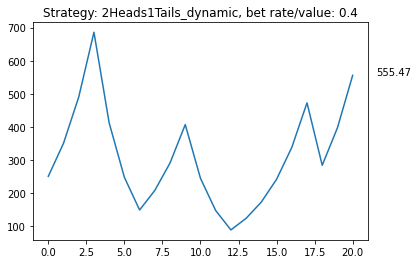

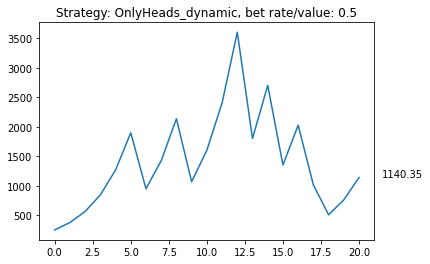

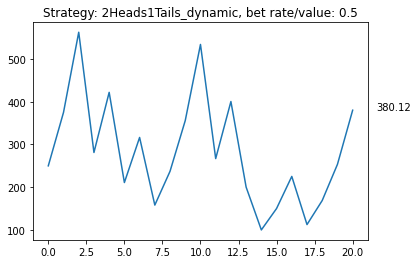

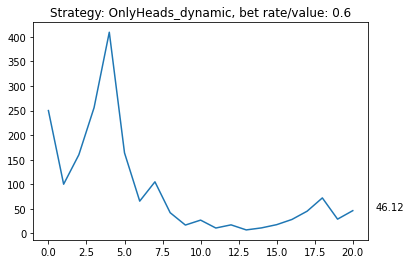

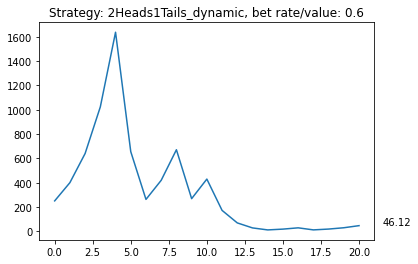

Round 9: Bet size smaller than 1. (0.4)


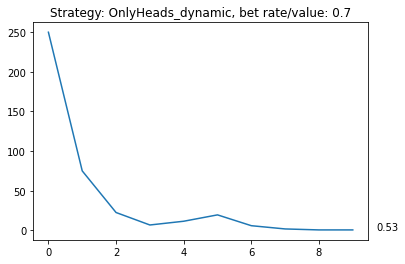

Round 14: Bet size smaller than 1. (0.9)


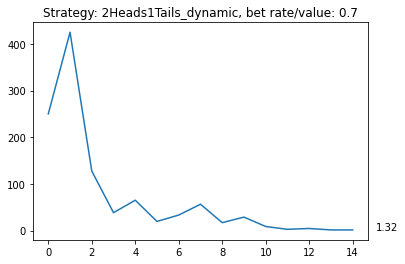

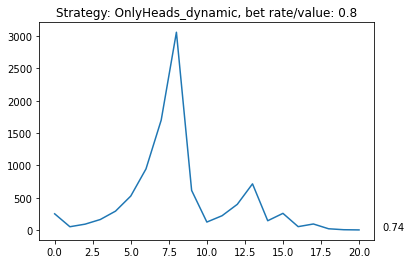

Round 14: Bet size smaller than 1. (0.8)


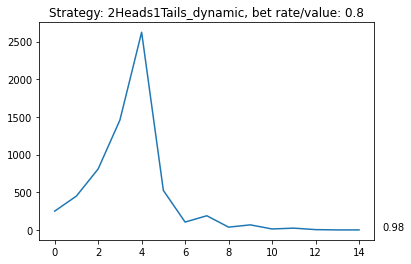

Round 14: Bet size smaller than 1. (0.4)


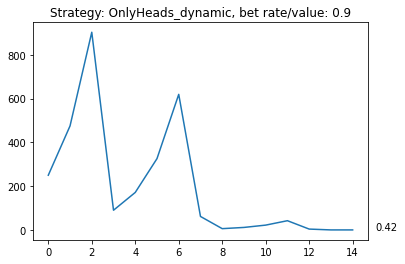

Round 6: Bet size smaller than 1. (0.8)


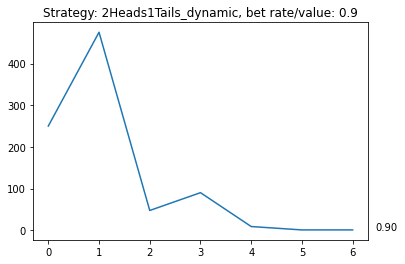

best strategy: Dynamic Heads Only(0.3), final value: 1158.07


In [ ]:
rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
values = [10,25,50,100]

initial_money = 250 
total_bets = 20
heads_prob = 0.6
experiment_trials = 1000

best = ["None", -1]

for v in values:
    OnlyHead_S = play_game(strategy_OnlyHeads_static, rate_or_value=v, plot=True)
    if OnlyHead_S > best[1]:
        best = [f"Static Heads Only({v})", OnlyHead_S]
    HeadsnTails_S = play_game(strategy_2Heads1Tails_static, rate_or_value=v, plot=True)
    if HeadsnTails_S > best[1]:
        best =[f"Static Mixed({v})", HeadsnTails_S]

for r in rates:
    OnlyHead_D = play_game(strategy_OnlyHeads_dynamic, rate_or_value=r, plot=True)
    if OnlyHead_D > best[1]:
        best = [f"Dynamic Heads Only({r})", OnlyHead_D]
    HeadsnTails_D = play_game(strategy_2Heads1Tails_dynamic, rate_or_value=r, plot=True)
    if HeadsnTails_D > best[1]:
        best = [f"Dynamic Mixed({r})", HeadsnTails_D]

print(f"best strategy: {best[0]}, final value: {best[1]:.2f}")